In [ ]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.datasets.mnist import load_data
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers

In [ ]:
#load the data
(X_train, y_train), (X_test, y_test) = load_data()

#check the input data
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)


In [ ]:
#check for the count and no. of labels in the dataset
train_label, label_freq = np.unique(y_train, return_counts = True)
test_label, test_freq = np.unique(y_test, return_counts = True)

print("No. of labels:", len(np.unique(y_train)))
print("Train label count:", dict(zip(train_label, label_freq)))
print("Test label count:", dict(zip(test_label, test_freq)))

No. of labels: 10
Train label count: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test label count: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


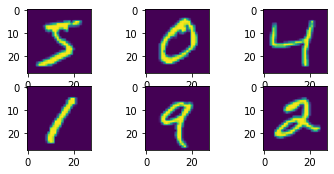

In [ ]:
#plot sample train images
fig = plt.figure()
for i in range(6):
    ax = fig.add_subplot(331 + i)
    ax.imshow(X_train[i])
    
plt.show()

In [ ]:
#convert to gray scale by normalizing the data to range [0,1]
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

#include the gray scale channel in input shape
input_shape = (28,28,1)

#define the number of target classes
tar_class = 10

#reshape the input data
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

#one hot encode the target class
y_train = to_categorical(y_train, tar_class)
y_test = to_categorical(y_test, tar_class)

In [ ]:
#split the data into train and validation 
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2)

#check the shape train, validation and test data
print("Shape of X_train:",X_train.shape)
print("Shape of y_train:",y_train.shape)
#print("Shape of X_val:",X_val.shape)
#print("Shape of y_val:",y_val.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


In [ ]:
#define the model layers
model = Sequential()
model.add(Dense(512, input_shape = input_shape, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(tar_class, activation = "softmax"))

model.compile(optimizer = "adam",
              loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 512)       1024      
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 256)       131328    
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 256)       0         
_________________________________________________________________
dense_2 (Dense)              (None, 28, 28, 128)       32896     
_________________________________________________________________
dense_3 (Dense)              (None, 28, 28, 64)        8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [ ]:
#train the model for 10 epochs, batch size of 32
history = model.fit(X_train, y_train,
                        epochs = 10,
                        verbose = True,
                        validation_split = 0.1,
                        batch_size = 32)

Epoch 1/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.3697 - accuracy: 0.8956 - val_loss: 0.2561 - val_accuracy: 0.9313
Epoch 2/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.3069 - accuracy: 0.9139 - val_loss: 0.2447 - val_accuracy: 0.9325
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2817 - accuracy: 0.9202 - val_loss: 0.2347 - val_accuracy: 0.9310
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2497 - accuracy: 0.9284 - val_loss: 0.2264 - val_accuracy: 0.9357
Epoch 5/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2302 - accuracy: 0.9335 - val_loss: 0.2266 - val_accuracy: 0.9375
Epoch 6/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2159 - accuracy: 0.9382 - val_loss: 0.2103 - val_accuracy: 0.9405
Epoch 7/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2026 - accuracy: 0.9414 - val_loss: 0.2155 -

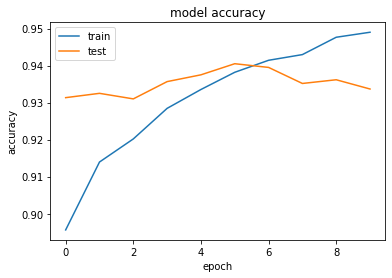

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

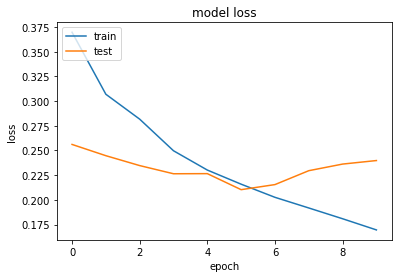

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()